In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
pip install openpyxl  # run only one time in single session 

     |████████████████████████████████| 249 kB 7.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Loading Libraries  

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
import missingno as msno

import plotly_express as px


import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid',{"grid.color": ".6", "grid.linestyle": ":"})

%matplotlib inline 


# Importing a files 

In [4]:
cpp=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [5]:
cpp_describe=pd.read_excel('/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx')

# Data Dictionary 

In [6]:
cpp_describe.iloc[3:29,[7,11]].sort_index().reset_index()

,index,Unnamed: 7,Unnamed: 11
0,3,Car_ID,Unique id of each observation (Interger)
1,4,Symboling,"Its assigned insurance risk rating, A value of..."
2,5,carCompany,Name of car company (Categorical)
3,6,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,7,aspiration,Aspiration used in a car (Categorical)
5,8,doornumber,Number of doors in a car (Categorical)
6,9,carbody,body of car (Categorical)
7,10,drivewheel,type of drive wheel (Categorical)
8,11,enginelocation,Location of car engine (Categorical)
9,12,wheelbase,Weelbase of car (Numeric)


## Checking few records of the dataset

In [7]:
cpp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Summary Statistics

In [8]:
cpp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# EDA & Data Visualization

In [9]:
cpp['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [10]:
cpp.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
cpp.shape

(205, 26)

In [12]:
cpp.corr()['price'][:-1].sort_values(ascending=False)

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

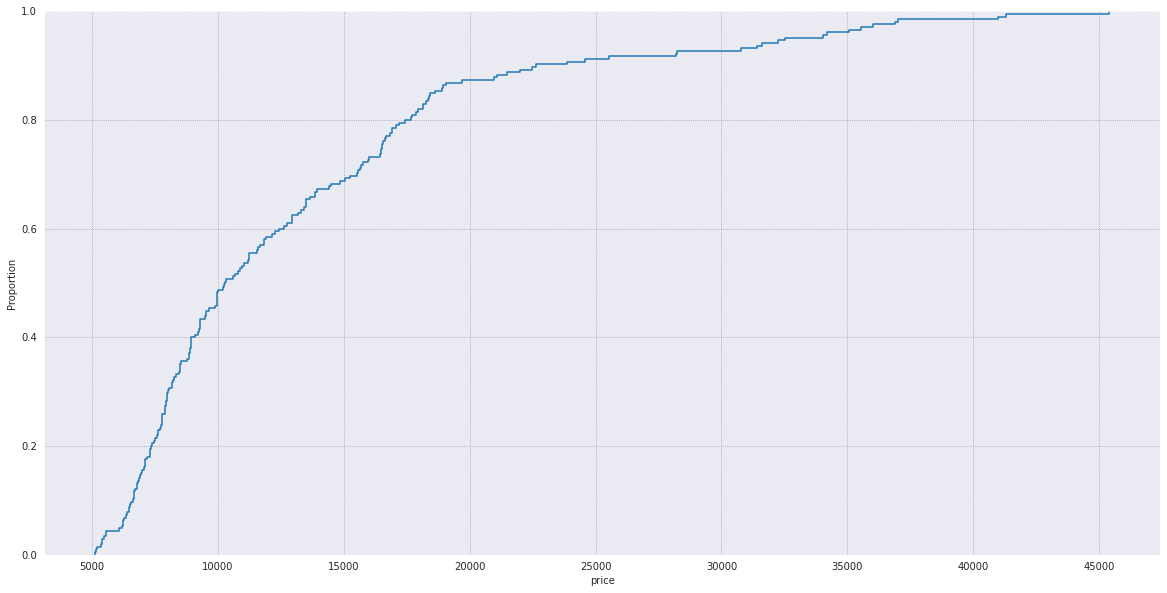

In [13]:
plt.figure(figsize=(20,10))
sns.ecdfplot(cpp['price'])
plt.show()

# Creating a new feature

In [14]:
cpp['price_range']=pd.cut(x=cpp['price'],bins=[5000,10000,15000,20000,25000,30000,35000,40000,45000])


In [15]:
np.mean(cpp['price'])

13276.710570731706

In [16]:
px.box(x='enginesize',y='price',data_frame=cpp,width=1000,height=800)


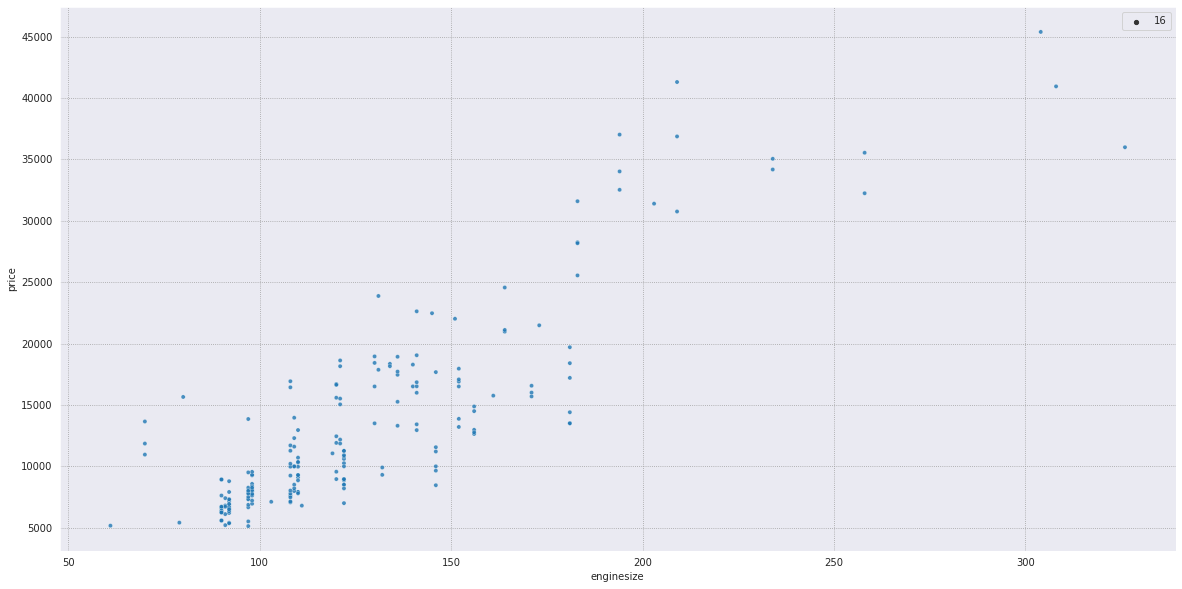

In [17]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=cpp['enginesize'],y=cpp['price'],x_jitter=True,y_jitter=True,alpha=0.8, size=16,markers=True )
plt.show()

# There are more sales upto of 200 enginesize upto $25000

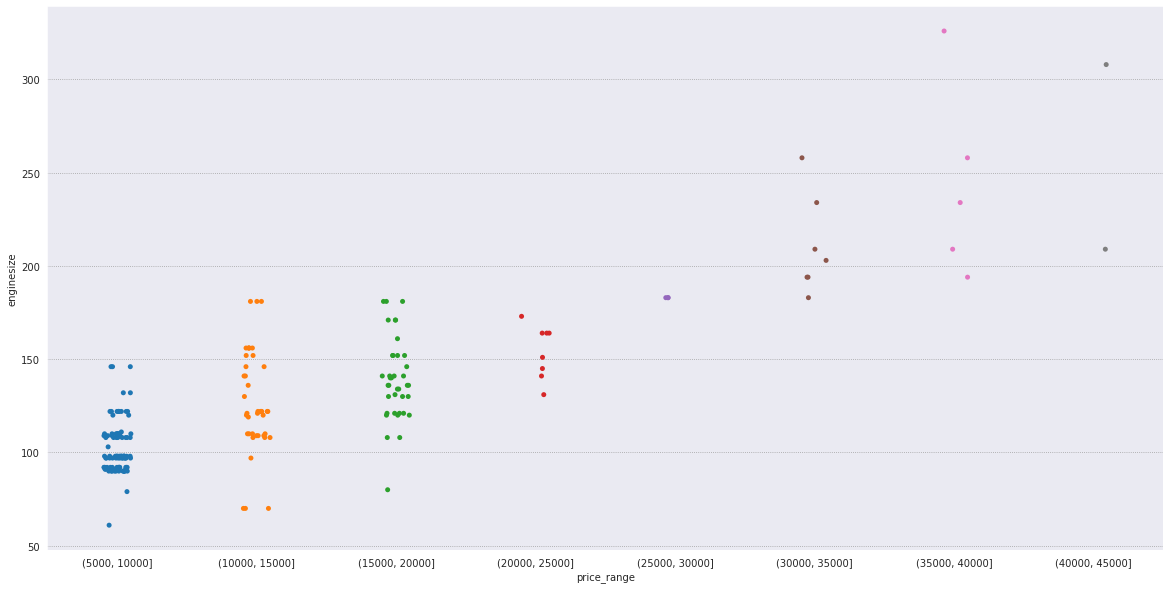

In [18]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='enginesize',x='price_range',jitter=True)
plt.show()

# There are more enginesizes available under the price of $ 20000

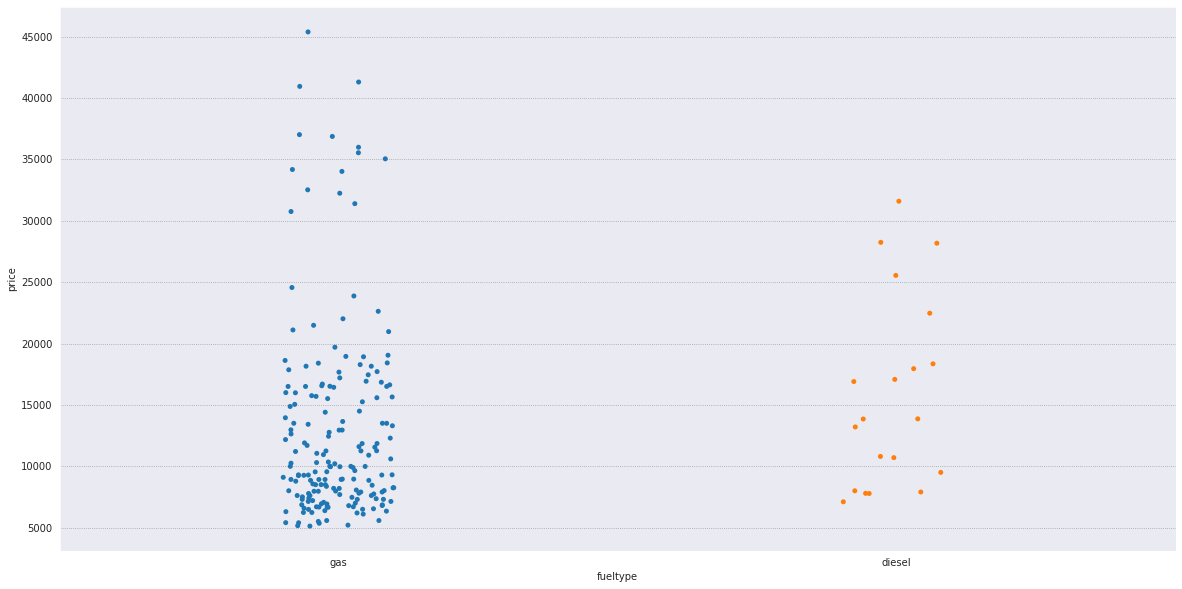

In [19]:
plt.figure(figsize=(20,10))
sns.stripplot(x=cpp['fueltype'],y=cpp['price'],jitter=True)
plt.show()

# People prefer to buy more gas car as compare to diesel

In [20]:
px.scatter(data_frame=cpp,x='curbweight',y='price')

# There is linear relation between curbweight and price

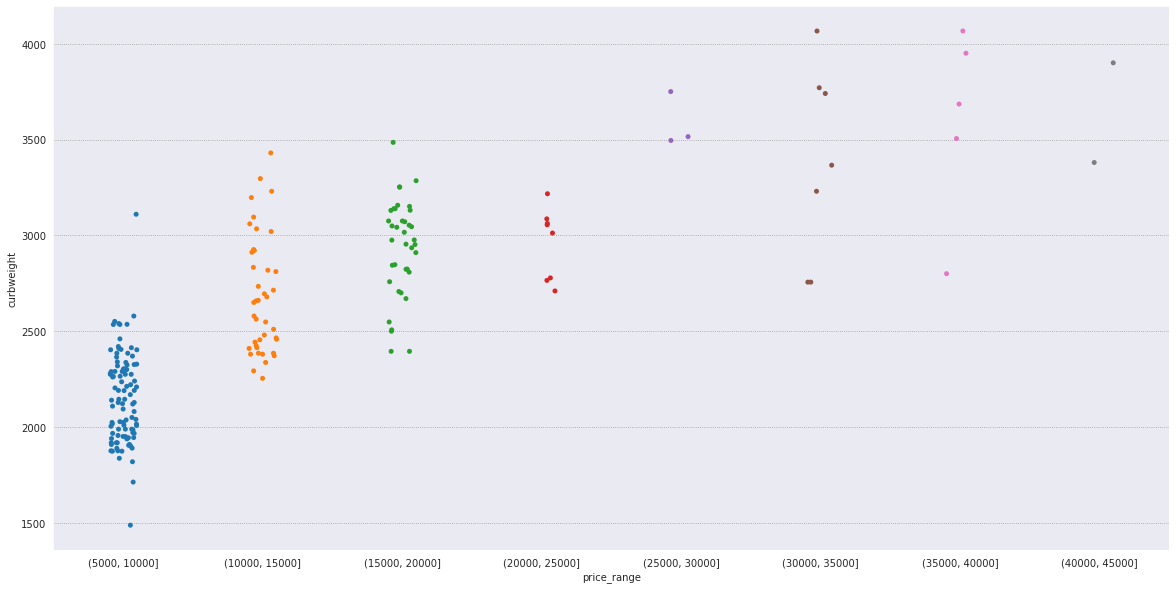

In [21]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='curbweight',x='price_range',jitter=True)
plt.show()

In [22]:
px.scatter(data_frame=cpp,x='horsepower',y='price')

# Horsepowe has a linear relation  with the price

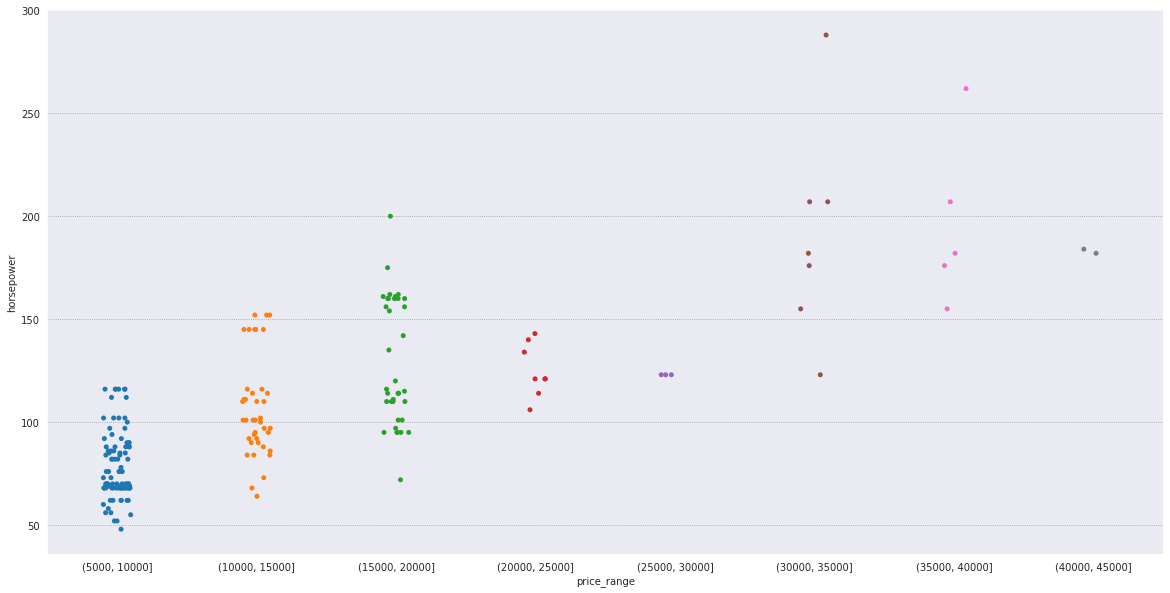

In [23]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='horsepower',x='price_range',jitter=True)
plt.show()

In [24]:
px.scatter(data_frame=cpp,x='carwidth',y='price')

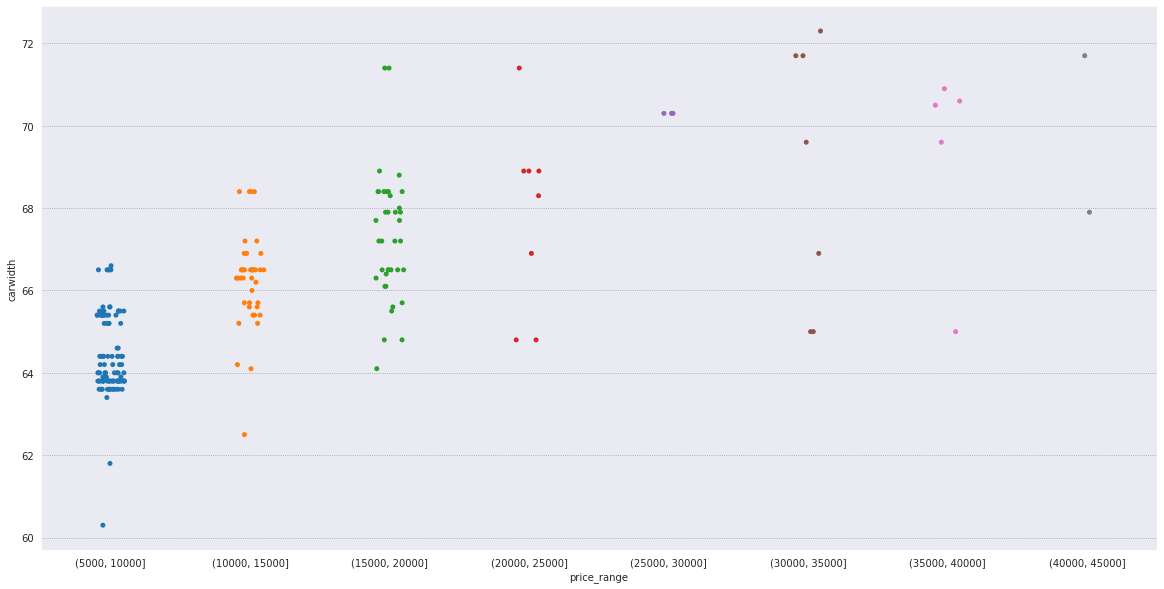

In [25]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='carwidth',x='price_range',jitter=True)
plt.show()

In [26]:
px.scatter(data_frame=cpp,x='carlength',y='price')

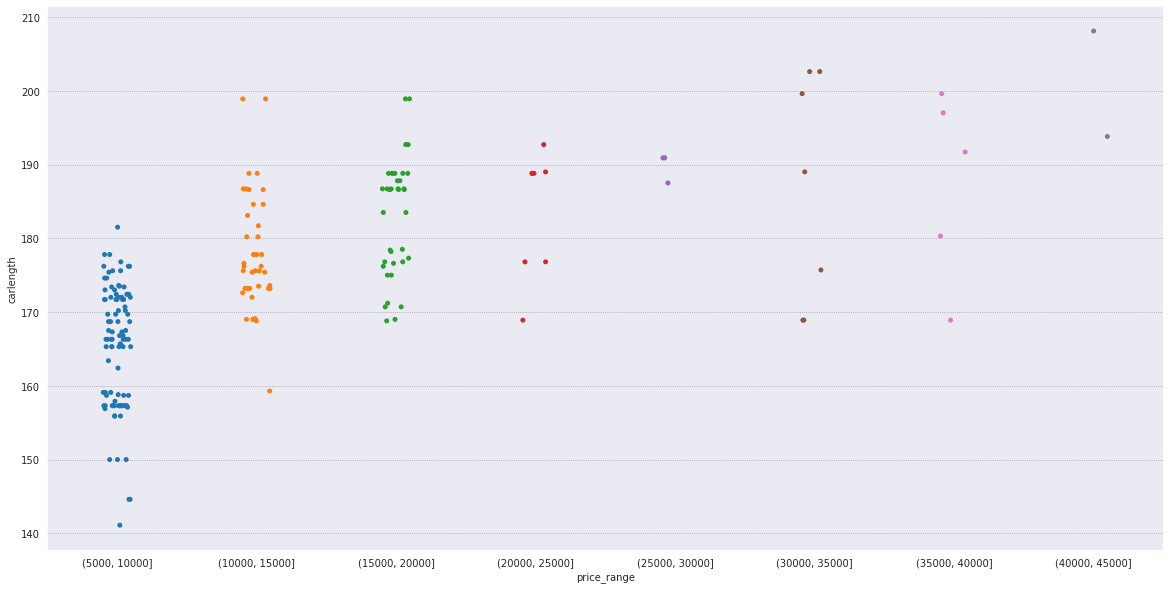

In [27]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='carlength',x='price_range',jitter=True)
plt.show()

In [28]:
px.scatter(data_frame=cpp,y='wheelbase',x='price')

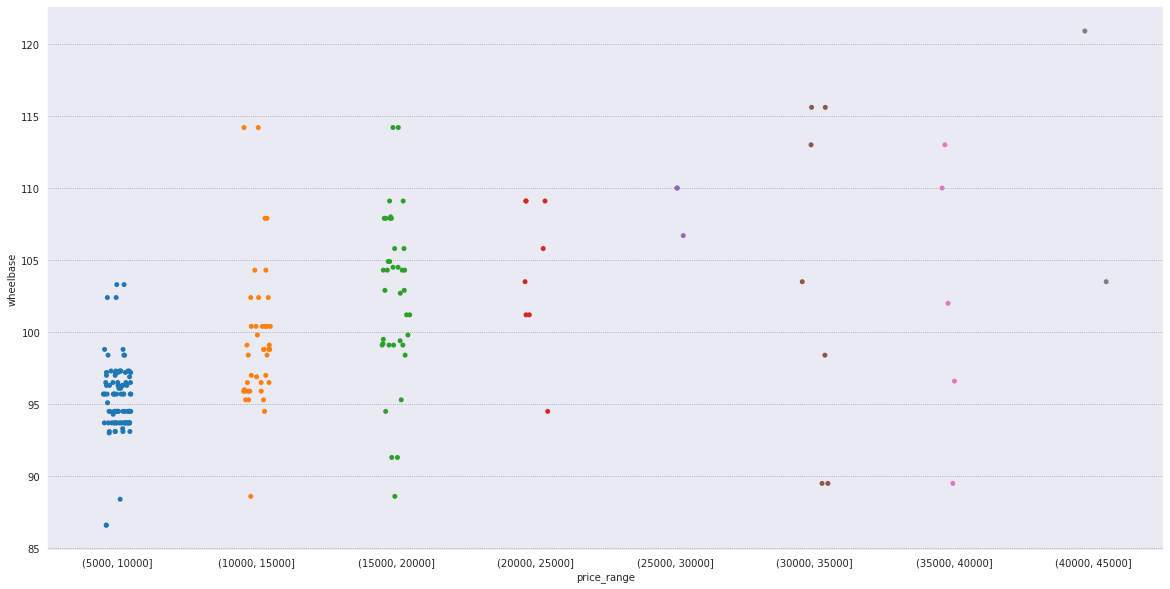

In [29]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='wheelbase',x='price_range',jitter=True)
plt.show()

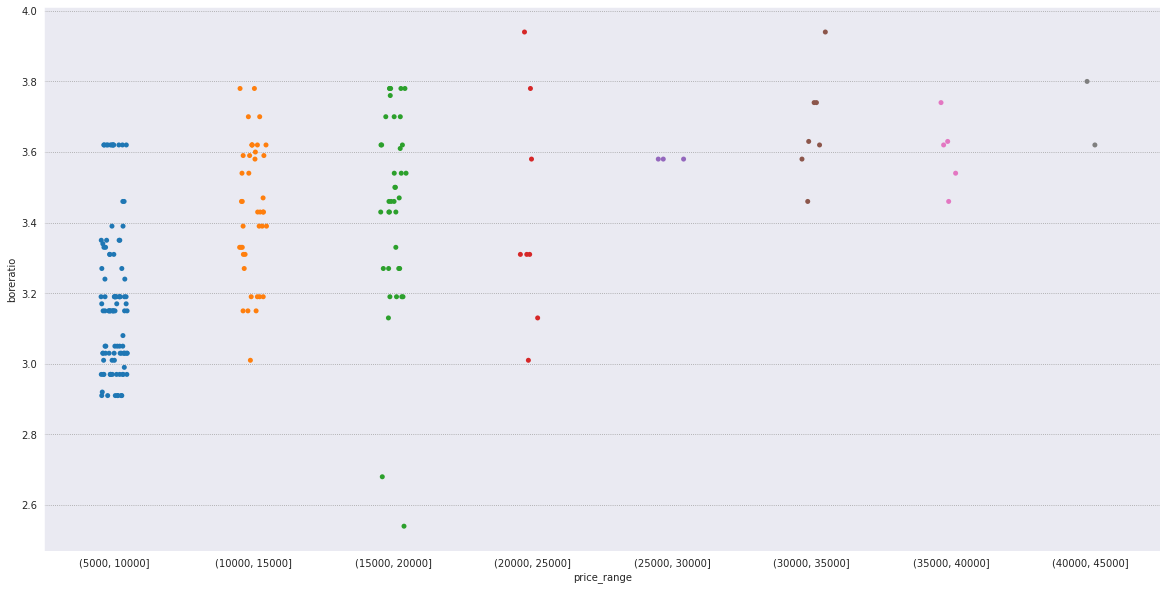

In [30]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='boreratio',x='price_range',jitter=True)
plt.show()

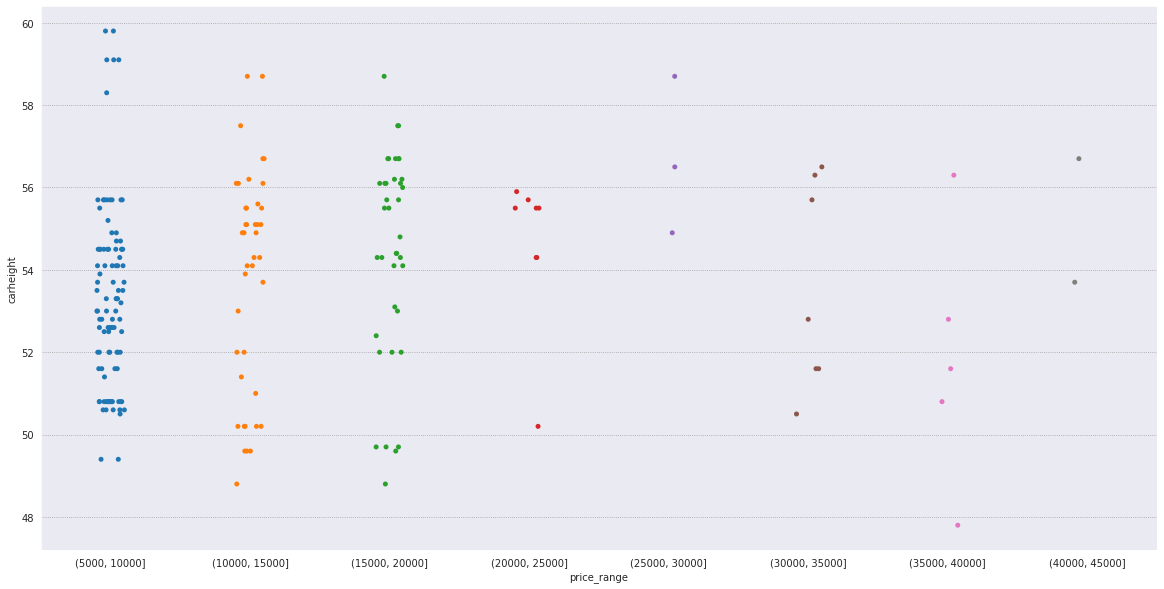

In [31]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='carheight',x='price_range',jitter=True)
plt.show()

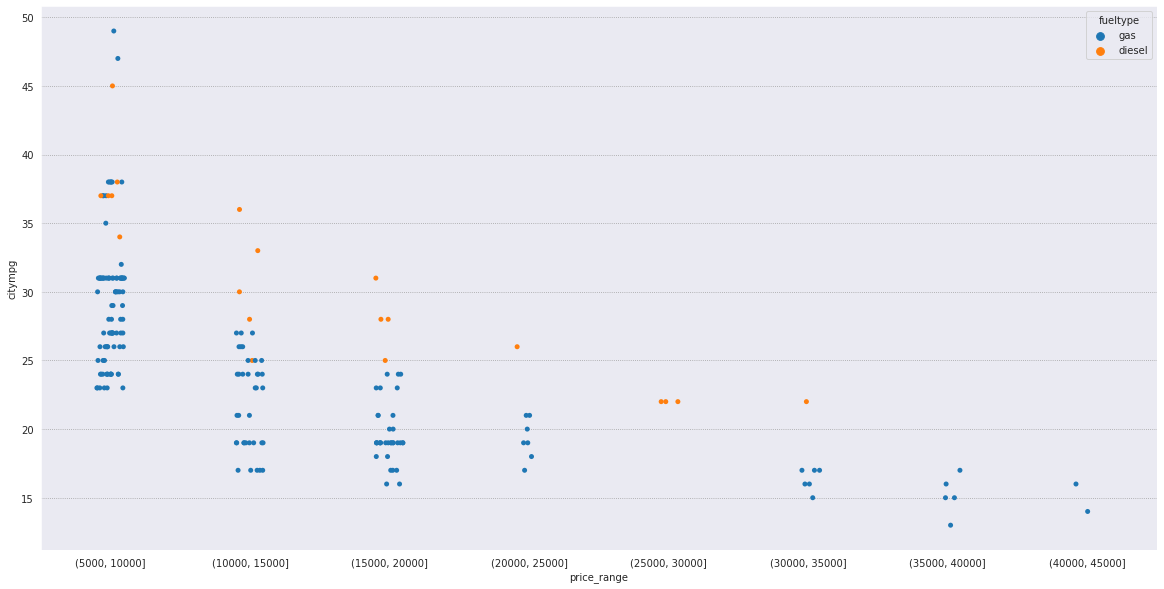

In [32]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='citympg',x='price_range',jitter=True,hue='fueltype')
plt.show()

# Gas  cars has more sales than diesel car

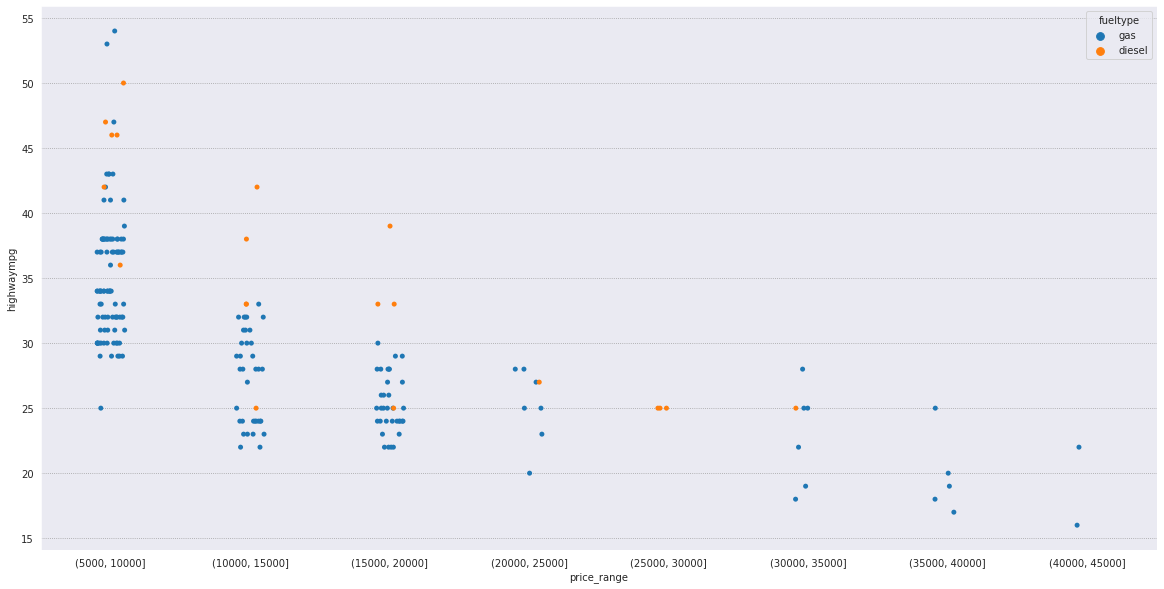

In [33]:
plt.figure(figsize=(20,10))
sns.stripplot(data=cpp,y='highwaympg',x='price_range',jitter=True,hue='fueltype')
plt.show()

In [34]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [35]:
cpp['CarName'].value_counts()

toyota corolla             6
toyota corona              6
peugeot 504                6
subaru dl                  4
mitsubishi mirage g4       3
                          ..
volvo 245                  1
dodge challenger se        1
buick opel isuzu deluxe    1
vw rabbit                  1
subaru brz                 1
Name: CarName, Length: 147, dtype: int64

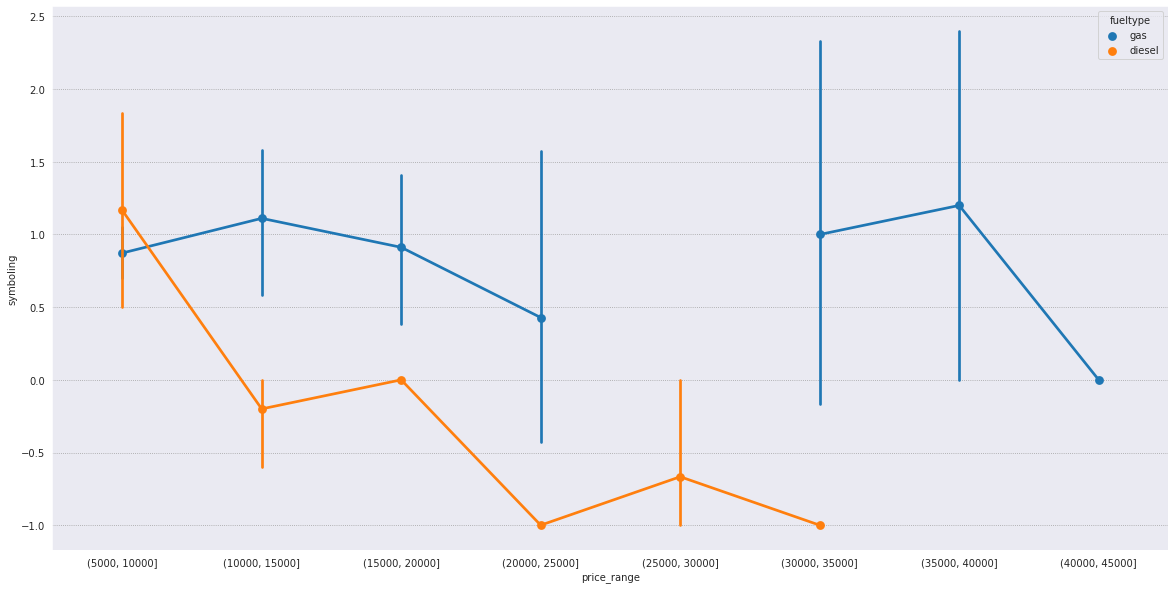

In [36]:
plt.figure(figsize=(20,10))
sns.pointplot(y='symboling',x='price_range',data=cpp,hue='fueltype')
plt.show()

In [37]:
cpp_describe.iloc[:7,11][4]

'Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) '

In [38]:
group_me=cpp.groupby('price_range')[['curbweight','price']].mean()

In [39]:
group_me

,curbweight,price
price_range,,
"(5000, 10000]",2152.760000,7723.110000
"(10000, 15000]",2680.731707,12245.073171
"(15000, 20000]",2936.184211,17140.478079
"(20000, 25000]",2960.625000,22389.125000
"(25000, 30000]",3586.666667,27325.333333
"(30000, 35000]",3383.428571,32392.928571
"(35000, 40000]",3601.200000,36102.800000
"(40000, 45000]",3640.000000,41137.500000


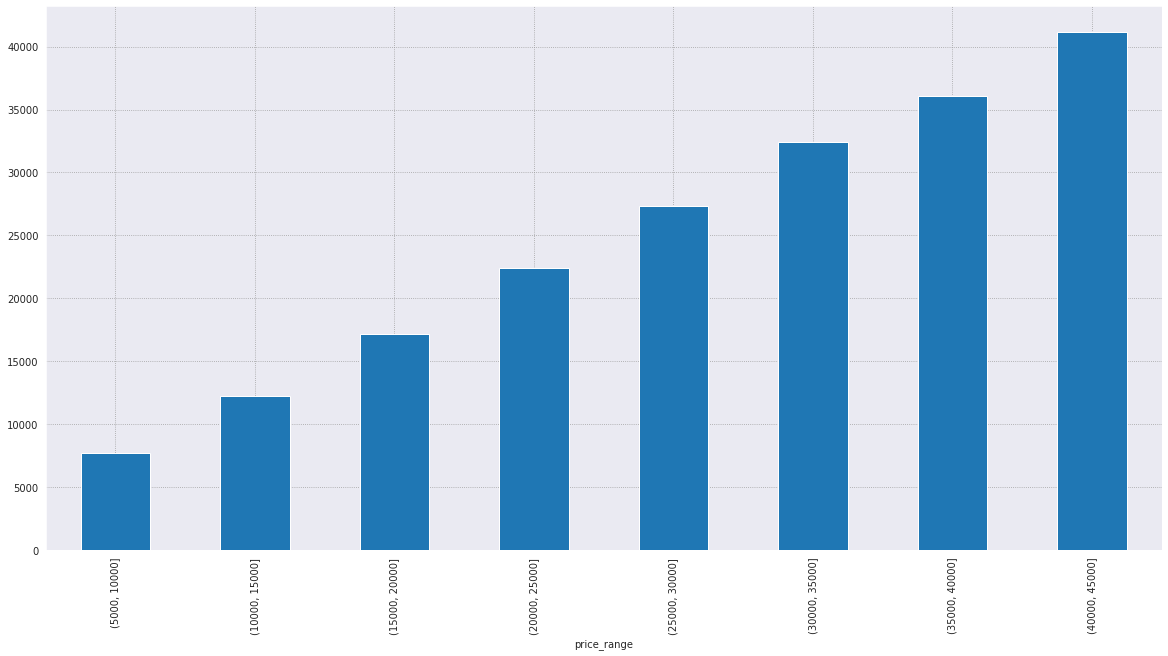

In [40]:
plt.figure(figsize=(20,10))
group_me['price'].plot.bar()
plt.show()

In [41]:
cpp.groupby('price_range')[['curbweight','enginesize','horsepower','carwidth','carlength','wheelbase','boreratio','citympg','highwaympg','price']].mean()

,curbweight,enginesize,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg,price
price_range,,,,,,,,,,
"(5000, 10000]",2152.760000,102.310000,77.980000,64.434000,165.405000,95.366000,3.177700,29.820000,35.670000,7723.110000
"(10000, 15000]",2680.731707,126.780488,106.902439,66.246341,177.953659,99.446341,3.435610,22.975610,28.146341,12245.073171
"(15000, 20000]",2936.184211,139.157895,129.578947,67.300000,183.097368,102.589474,3.445789,20.500000,26.052632,17140.478079
"(20000, 25000]",2960.625000,154.125000,125.000000,67.862500,183.825000,104.187500,3.421250,20.125000,25.375000,22389.125000
"(25000, 30000]",3586.666667,183.000000,123.000000,70.300000,189.766667,108.900000,3.580000,22.000000,25.000000,27325.333333
"(30000, 35000]",3383.428571,210.714286,191.142857,68.885714,186.757143,103.585714,3.672857,17.142857,23.142857,32392.928571
"(35000, 40000]",3601.200000,244.200000,196.400000,69.320000,187.500000,102.220000,3.598000,15.200000,19.800000,36102.800000
"(40000, 45000]",3640.000000,258.500000,183.000000,69.800000,200.950000,112.200000,3.710000,15.000000,19.000000,41137.500000


In [42]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [43]:
cpp_object_df=cpp.select_dtypes(include='object')
    

In [44]:
cpp_object_df.nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [45]:
cpp['fueltype']=cpp['fueltype'].map({'gas':1,'diesel':0})

In [46]:
cpp['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [47]:
cpp['aspiration']=cpp['aspiration'].map({'std':1,'turbo':0})

In [48]:
cpp['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [49]:
cpp['doornumber']=cpp['doornumber'].map({'four':1,'two':0})

In [50]:
cpp['carbody'].value_counts(normalize=True)

sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64

In [51]:
carbody=pd.get_dummies(cpp['carbody'],drop_first=True,prefix='carbody_')

In [52]:
drivewheel=pd.get_dummies(cpp['drivewheel'],drop_first=True,prefix='drivewheel_')

In [53]:
cpp['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [54]:
cpp['enginelocation']=cpp['enginelocation'].map({'front':1,'rear':0})

In [55]:
cpp['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [56]:
enginetype=pd.get_dummies(cpp['enginetype'],drop_first=True,prefix='enginetype_')

In [57]:
cpp['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [58]:
cylindernumber=pd.get_dummies(cpp['cylindernumber'],drop_first=True,prefix='cylinernumber_')

In [59]:
cpp['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [60]:
fuelsystem=pd.get_dummies(cpp['fuelsystem'],drop_first=True,prefix='fuelsystem_')

In [61]:
cpp=pd.concat([cpp.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1),carbody,drivewheel,enginetype,cylindernumber,fuelsystem],axis=1)

In [62]:
cpp.drop(['car_ID','CarName'],axis=1,inplace=True)

In [63]:
cpp_under_25k=cpp[cpp['price'] <25000]

In [64]:
cpp_under_25k.corr()['price'].sort_values(ascending=False)[1:16]

curbweight             0.837452
carwidth               0.764809
horsepower             0.752297
carlength              0.728183
enginesize             0.719674
wheelbase              0.639787
fuelsystem__mpfi       0.627650
drivewheel__rwd        0.616495
boreratio              0.491275
cylinernumber__six     0.450936
cylinernumber__five    0.281170
enginetype__ohcv       0.258328
carheight              0.213242
enginetype__l          0.193387
carbody__sedan         0.150428
Name: price, dtype: float64

In [65]:
cpp_above_25k=cpp[cpp['price'] >25000]

In [66]:
cpp_above_25k.corr()['price'].sort_values(ascending=False)[1:12]

fuelsystem__mpfi      0.648861
aspiration            0.648861
fueltype              0.648861
enginesize            0.638671
enginetype__ohcv      0.518220
horsepower            0.328680
boreratio             0.291955
symboling             0.245120
carlength             0.239699
peakrpm               0.147711
cylinernumber__six    0.142073
Name: price, dtype: float64

In [67]:
cpp.drop('price_range',axis=1,inplace=True)

In [68]:
X=cpp[['curbweight','carwidth','horsepower','carlength','enginesize',
       'drivewheel__rwd','cylinernumber__five','enginetype__ohcv',
       'enginetype__l','carbody__sedan','aspiration','fueltype']].values
y=cpp['price'].values

In [69]:
scale=StandardScaler()

In [70]:
X=scale.fit_transform(X)

In [71]:
X=sm.add_constant(X)

In [72]:
est=sm.OLS(y,X).fit()

In [73]:
print(est.summary(xname=['constant','curbweight','carwidth','horsepower','carlength','enginesize',
       'drivewheel__rwd','cylinernumber__five','enginetype__ohcv',
       'enginetype__l','carbody__sedan','aspiration','fueltype']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     91.96
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           9.05e-73
Time:                        07:05:51   Log-Likelihood:                -1936.8
No. Observations:                 205   AIC:                             3900.
Df Residuals:                     192   BIC:                             3943.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
constant             1.328e+04    

# Car price Prediction under $25k

In [74]:
cpp_under_25k.corr()['price'].sort_values(ascending=False)[1:16]

curbweight             0.837452
carwidth               0.764809
horsepower             0.752297
carlength              0.728183
enginesize             0.719674
wheelbase              0.639787
fuelsystem__mpfi       0.627650
drivewheel__rwd        0.616495
boreratio              0.491275
cylinernumber__six     0.450936
cylinernumber__five    0.281170
enginetype__ohcv       0.258328
carheight              0.213242
enginetype__l          0.193387
carbody__sedan         0.150428
Name: price, dtype: float64

In [75]:
cpp_under_25k=cpp_under_25k[['curbweight','carwidth','horsepower','carlength','enginesize','wheelbase','fuelsystem__mpfi','drivewheel__rwd',
                            'boreratio','cylinernumber__six','cylinernumber__five','enginetype__ohcv','carheight','enginetype__l','carbody__sedan','price']].copy()

In [76]:
cpp_under_25k

,curbweight,carwidth,horsepower,carlength,enginesize,wheelbase,fuelsystem__mpfi,drivewheel__rwd,boreratio,cylinernumber__six,cylinernumber__five,enginetype__ohcv,carheight,enginetype__l,carbody__sedan,price
0,2548,64.1,111,168.8,130,88.6,1,1,3.47,0,0,0,48.8,0,0,13495.0
1,2548,64.1,111,168.8,130,88.6,1,1,3.47,0,0,0,48.8,0,0,16500.0
2,2823,65.5,154,171.2,152,94.5,1,1,2.68,1,0,1,52.4,0,0,16500.0
3,2337,66.2,102,176.6,109,99.8,1,0,3.19,0,0,0,54.3,0,1,13950.0
4,2824,66.4,115,176.6,136,99.4,1,0,3.19,0,1,0,54.3,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,68.9,114,188.8,141,109.1,1,1,3.78,0,0,0,55.5,0,1,16845.0
201,3049,68.8,160,188.8,141,109.1,1,1,3.78,0,0,0,55.5,0,1,19045.0
202,3012,68.9,134,188.8,173,109.1,1,1,3.58,1,0,1,55.5,0,1,21485.0
203,3217,68.9,106,188.8,145,109.1,0,1,3.01,1,0,0,55.5,0,1,22470.0


In [77]:
cpp_under_25k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 204
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   curbweight           187 non-null    int64  
 1   carwidth             187 non-null    float64
 2   horsepower           187 non-null    int64  
 3   carlength            187 non-null    float64
 4   enginesize           187 non-null    int64  
 5   wheelbase            187 non-null    float64
 6   fuelsystem__mpfi     187 non-null    uint8  
 7   drivewheel__rwd      187 non-null    uint8  
 8   boreratio            187 non-null    float64
 9   cylinernumber__six   187 non-null    uint8  
 10  cylinernumber__five  187 non-null    uint8  
 11  enginetype__ohcv     187 non-null    uint8  
 12  carheight            187 non-null    float64
 13  enginetype__l        187 non-null    uint8  
 14  carbody__sedan       187 non-null    uint8  
 15  price                187 non-null    flo

In [78]:
X_under_25k=cpp_under_25k.drop(['price','wheelbase','carheight','boreratio'],axis=1)
X_under_25k_copy= X_under_25k.copy()
X_under_25k=cpp_under_25k.drop(['price','wheelbase','carheight','boreratio'],axis=1).values
y_under_25k=cpp_under_25k['price'].values

In [79]:
X_under_25k_copy.columns

Index(['curbweight', 'carwidth', 'horsepower', 'carlength', 'enginesize',
       'fuelsystem__mpfi', 'drivewheel__rwd', 'cylinernumber__six',
       'cylinernumber__five', 'enginetype__ohcv', 'enginetype__l',
       'carbody__sedan'],
      dtype='object')

In [80]:
X_under_25k=scale.fit_transform(X_under_25k)

In [81]:
X_under_25k=sm.add_constant(X_under_25k)

In [82]:
model_under_25k=sm.OLS(y_under_25k,X_under_25k).fit()

In [83]:
X_under_25k_copy.columns

Index(['curbweight', 'carwidth', 'horsepower', 'carlength', 'enginesize',
       'fuelsystem__mpfi', 'drivewheel__rwd', 'cylinernumber__six',
       'cylinernumber__five', 'enginetype__ohcv', 'enginetype__l',
       'carbody__sedan'],
      dtype='object')

In [84]:
print(model_under_25k.summary( xname=['constant','curbweigh','carwidth','horsepower','carlength','enginesize','fuelsystem__mpfi',
                                     'drivewheel__rwd','cylinernumber__six','cylinernumber__five','enginetype__ohcv','enginetype__l',
                             'carbody__sedan']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     72.12
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           5.80e-61
Time:                        07:05:52   Log-Likelihood:                -1673.9
No. Observations:                 187   AIC:                             3374.
Df Residuals:                     174   BIC:                             3416.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
constant             1.126e+04    

# Car price Prediction above $25k

In [85]:
cpp_above_25k.corr()['price'].sort_values(ascending=False)[1:12]

fuelsystem__mpfi      0.648861
aspiration            0.648861
fueltype              0.648861
enginesize            0.638671
enginetype__ohcv      0.518220
horsepower            0.328680
boreratio             0.291955
symboling             0.245120
carlength             0.239699
peakrpm               0.147711
cylinernumber__six    0.142073
Name: price, dtype: float64

In [86]:
cpp_above_25k=cpp_above_25k[['fuelsystem__mpfi','aspiration','fueltype','enginesize','enginetype__ohcv','horsepower','boreratio',
                            'symboling','carlength','peakrpm','cylinernumber__six','price']].copy()

In [87]:
X_above_25k=cpp_above_25k[['aspiration','carlength','symboling','fueltype','fuelsystem__mpfi']].copy()
X_above_25k_copy=X_above_25k.copy()
X_above_25k=X_above_25k.values
y_above_25k=cpp_above_25k['price'].values



In [88]:
X_above_25k=scale.fit_transform(X_above_25k)

In [89]:
X_above_25k=sm.add_constant(X_above_25k)

In [90]:
model_above_25k=sm.OLS(y_above_25k,X_above_25k).fit()

In [91]:
print(model_above_25k.summary(xname=['constant','aspiration','carlength','symboling','fueltype','fuelsystem__mpfi']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     9.982
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           0.000889
Time:                        07:05:52   Log-Likelihood:                -167.98
No. Observations:                  18   AIC:                             344.0
Df Residuals:                      14   BIC:                             347.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
constant          3.427e+04    730.584  

# If you enjoy my work, please upvote for it and leave a comment so that I may continue to create high-quality material.